<a href="https://colab.research.google.com/github/daniel-usp/risco/blob/main/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 640 kB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from scipy.stats import norm

#Inserir os tickers conforme o Yahoo Finance
TickerA= 'PETR4.SA'
prices=pd.DataFrame() 
tickers = [TickerA] #Inserir tickers
for t in tickers:
  data = yf.Ticker(t)
  prices[t]= data.history(period="756d")['Close'].dropna()
rets = np.log(prices/prices.shift(1)).dropna()
rets


,PETR4.SA
Date,
2019-05-03,0.004479
2019-05-06,-0.002984
2019-05-07,-0.015814
2019-05-08,0.037979
2019-05-09,-0.019927
...,...
2022-05-12,0.007715
2022-05-13,0.012922
2022-05-16,0.009872


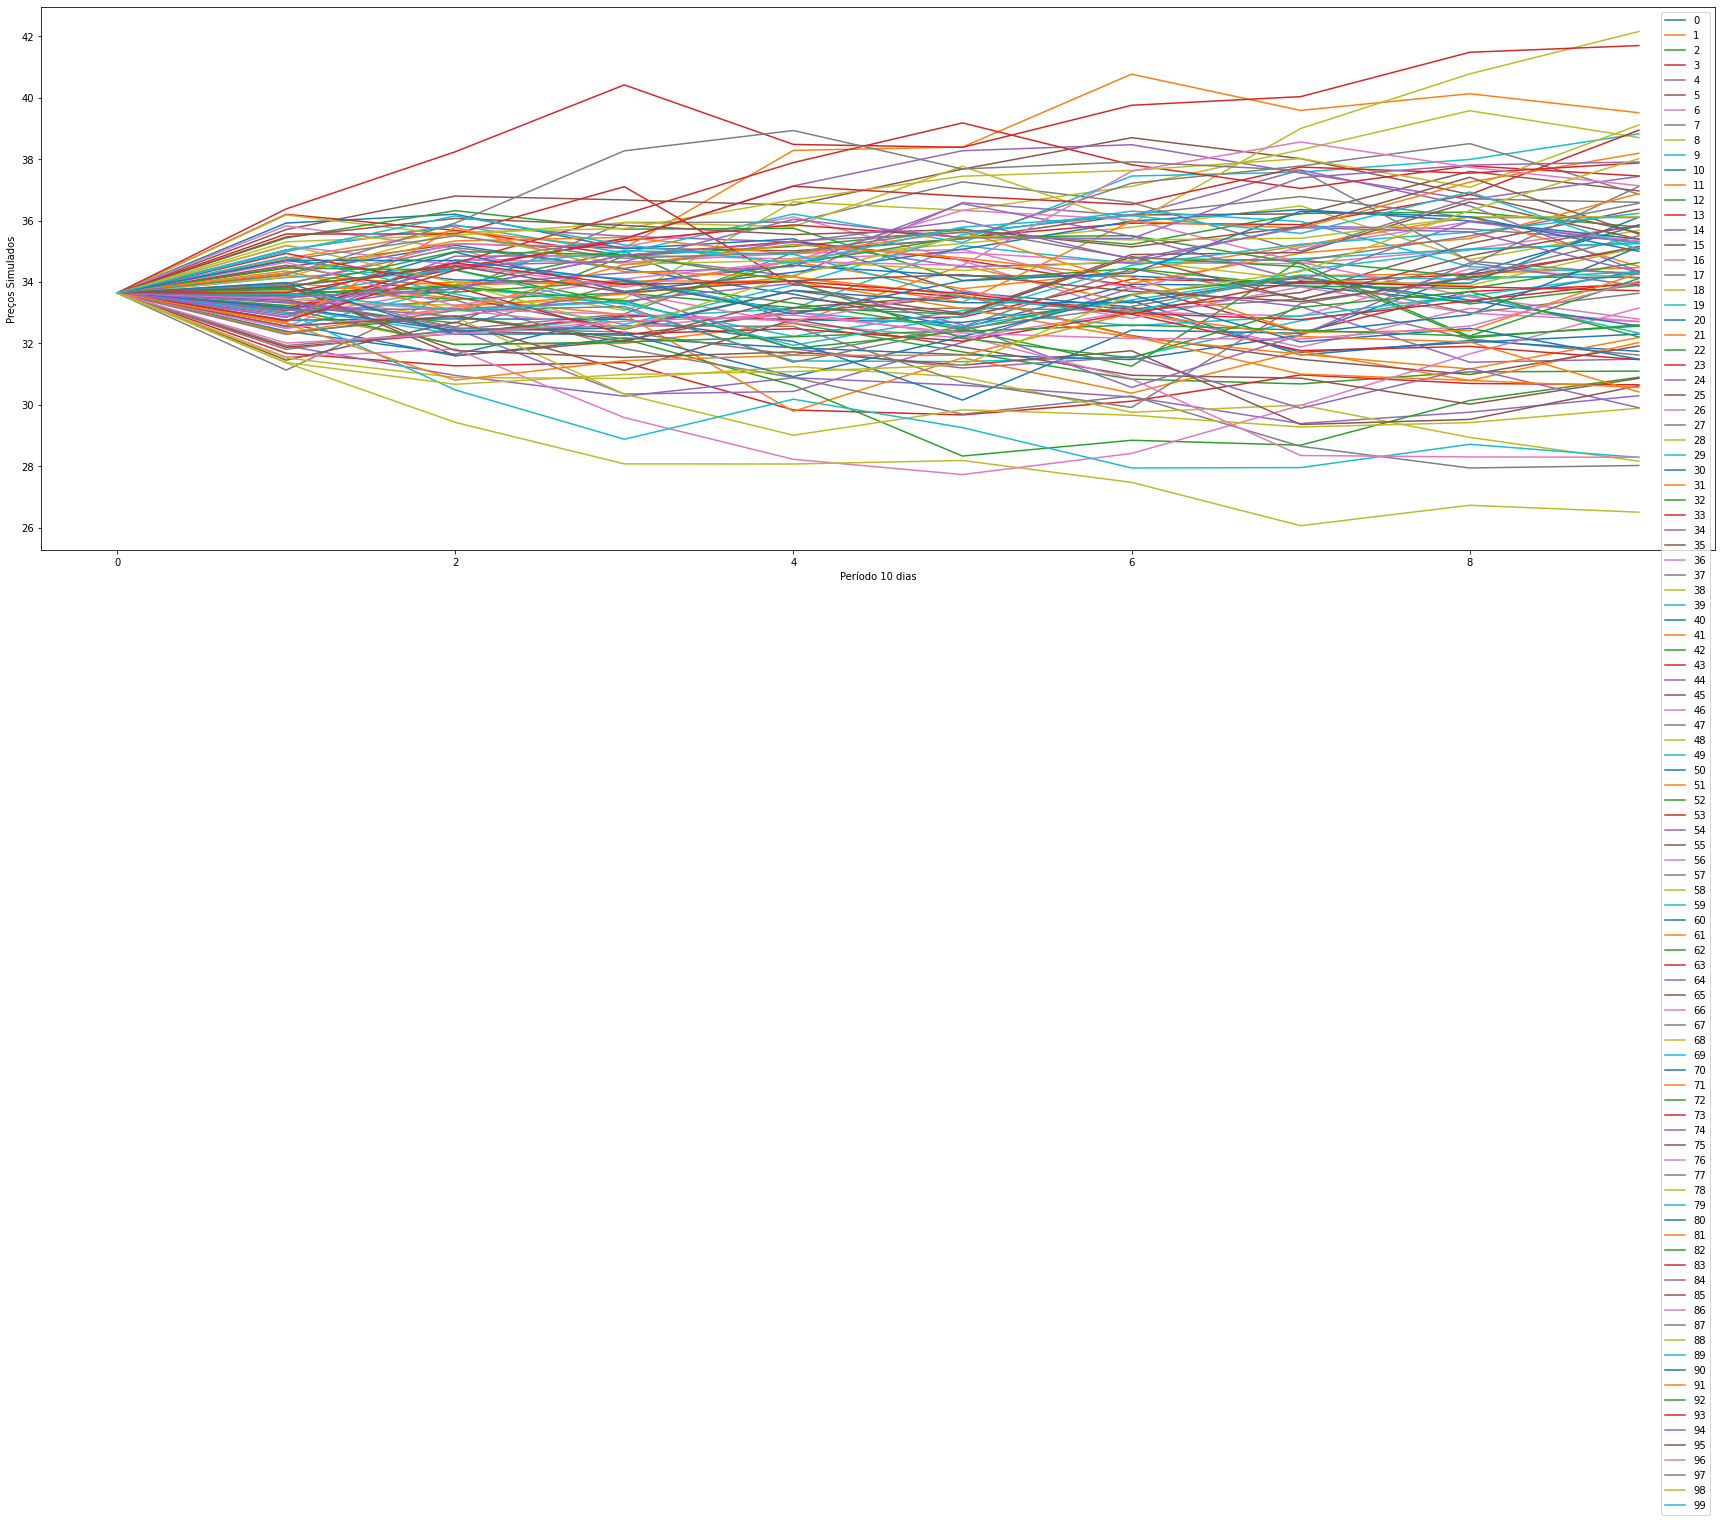

In [ ]:
#Cálculo do Drift e da Volatilidade
u = rets.mean()
var = rets.var()
drift = u - (0.5*var)

stdev = rets.std()
days = 10
trials = 100
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

#Cálculo dos Preços simulados
price_paths = np.zeros_like(daily_returns)
price_paths[0] = prices.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]
pd.DataFrame(price_paths).plot(figsize=(30,10))
plt.ylabel('Preços Simulados')
plt.xlabel('Período %d dias' %days)
plt.show()